In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import seaborn as sns

In [ ]:
archivo = "city.jpg"
img = Image.open(archivo)
img.size

(474, 474)

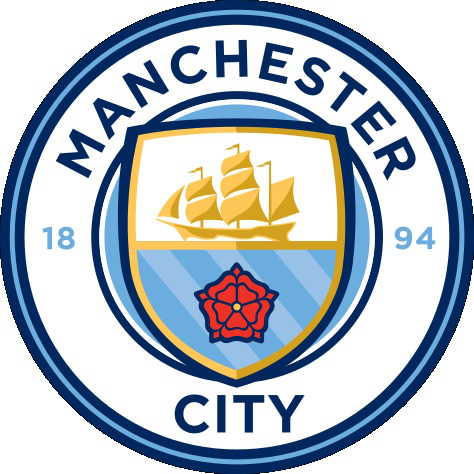

In [ ]:
img

In [ ]:
img.getdata

<bound method Image.getdata of <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=474x474 at 0x7F5950210690>>

In [ ]:
azul = img.getdata(band=2)
azul

In [ ]:
img_mat = np.array(list(azul), float)
img_mat.size

224676

In [ ]:
img_mat.shape = (img.size[1], img.size[0])
img_mat.shape

(474, 474)

In [ ]:
img_mat = np.matrix(img_mat)
img_mat

matrix([[255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        ...,
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.],
        [255., 255., 255., ..., 255., 255., 255.]])

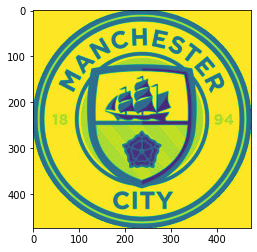

In [ ]:
plt.imshow(img_mat)

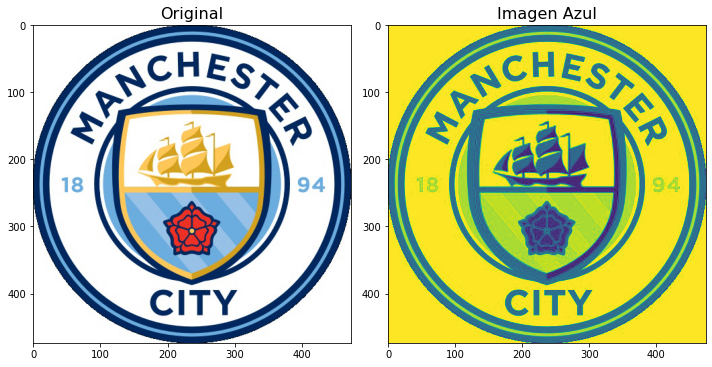

In [ ]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
axs[0].imshow(img)
axs[0].set_title('Original', size=16)
axs[1].imshow(img_mat)
axs[1].set_title('Imagen Azul', size=16)
plt.tight_layout()
plt.savefig('Comparación.jpg',dpi=150)

In [ ]:
img_mat_Z= (img_mat-img_mat.mean())/img_mat.std()

In [ ]:
U, S, V = np.linalg.svd(img_mat_Z)

In [ ]:
print(U.shape)
print(V.shape)
print(S.shape)

(474, 474)
(474, 474)
(474,)


In [ ]:
A = np.array([[1, 0, 1],[-2, 1, 0]])
U_A, S_A, V_A = np.linalg.svd(A)

In [ ]:
U_A

array([[-0.4472136 ,  0.89442719],
       [ 0.89442719,  0.4472136 ]])

In [ ]:
V_A

array([[-9.12870929e-01,  3.65148372e-01, -1.82574186e-01],
       [-3.73536832e-16,  4.47213595e-01,  8.94427191e-01],
       [-4.08248290e-01, -8.16496581e-01,  4.08248290e-01]])

In [ ]:
S_A

array([2.44948974, 1.        ])

In [ ]:
vars = np.round(S**2/np.sum(S**2), decimals=4)

In [ ]:
print(vars[1:10])
print(vars[-10:])

[0.1262 0.0877 0.0768 0.0593 0.04   0.0371 0.032  0.0259 0.0253]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


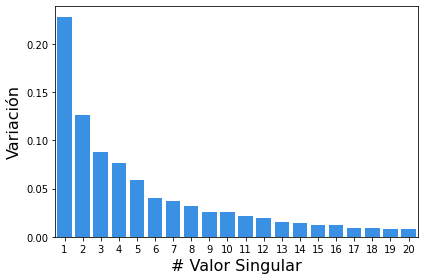

In [ ]:
sns.barplot(x=list(range(1,21)), y=vars[0:20], color="dodgerblue")
plt.xlabel('# Valor Singular', fontsize=16)
plt.ylabel('Variación', fontsize=16)
plt.tight_layout()
plt.savefig('svd_vars.png',dpi=150, figsize=(8,6))

In [ ]:
s=np.diag(S)

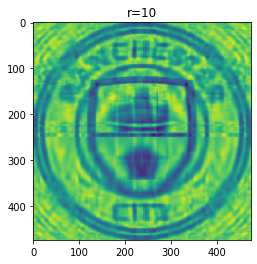

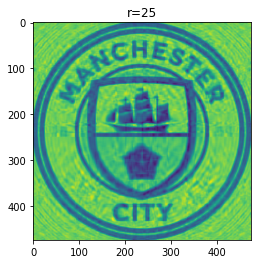

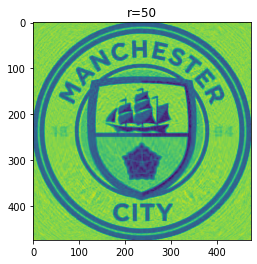

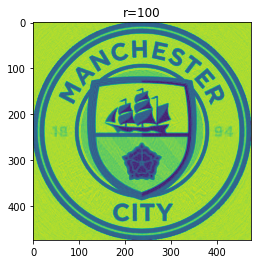

In [ ]:
j=0
for r in (10, 25, 50, 100):
  aprox=U[:,:r] @ s[0:r,:r] @ V[:r,:]
  plt.figure(j+1)
  j += 1
  img=plt.imshow(aprox)
  plt.title('r=' + str(r))
  plt.show()